# Calculating Correlation Between Stocks 

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
from pandas_datareader import data as wb 
import yfinance

In [2]:
yfinance.pdr_override()

## Importing Data & Getting it's Daily Return

In [3]:
tickers = ['INCO.jk', 'AMRT.jk', 'APIC.jk', 'ITMG.jk', 'MEDC.jk', 'HEXA.jk', 'MFIN.jk', 'MPMX.jk', 'BSSR.jk', 'BFIN.jk', 'UNTR.jk', 'ARNA.jk', 'UNTR.jk','ADMF.jk','MBAP.jk','MTDL.jk','ADRO.jk','SRTG.jk','INDF.jk', 'BYAN.jk']
financial_institution = pd.DataFrame()
for ticker in tickers : 
    financial_institution[ticker] = wb.get_data_yahoo(ticker, start = '2017-01-01', end = '2023-04-01')['Adj Close']
financial_institution.head()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

,INCO.jk,AMRT.jk,APIC.jk,ITMG.jk,MEDC.jk,HEXA.jk,MFIN.jk,MPMX.jk,BSSR.jk,BFIN.jk,UNTR.jk,ARNA.jk,ADMF.jk,MBAP.jk,MTDL.jk,ADRO.jk,SRTG.jk,INDF.jk,BYAN.jk
Date,,,,,,,,,,,,,,,,,,,
2017-01-02,2793.845947,587.474915,428.0,6581.563477,236.869095,1257.818359,262.041595,295.660492,596.831055,262.053711,16619.794922,376.830048,3709.806641,997.4021,113.488525,1065.457275,613.484619,6325.399902,421.121338
2017-01-03,2754.217041,582.775146,416.0,6747.321289,242.252472,1253.694336,262.041595,292.054871,596.831055,262.053711,16424.269531,380.453461,3599.885742,997.4021,112.615532,1093.743652,613.484619,6165.768555,421.121338
2017-01-04,2694.773438,545.176636,410.0,6630.315430,279.038940,1253.694336,262.041595,288.449280,596.831055,247.079239,16737.111328,297.116028,3517.446045,997.4021,111.742538,1068.600098,611.731750,6225.630371,421.121338
2017-01-05,2813.660400,545.176636,412.0,6406.054688,269.169434,1253.694336,263.765564,288.449280,596.831055,258.310150,17186.824219,360.887299,3489.965576,997.4021,111.742538,1046.599609,604.720520,6385.261230,421.121338
2017-01-06,2902.825684,554.576294,412.0,6474.308105,270.963898,1274.314331,263.765564,295.660492,596.831055,258.310150,16971.746094,362.336639,3462.485596,997.4021,113.488525,1065.457275,604.720520,6405.215820,414.102661


In [4]:
daily_return = financial_institution.pct_change()
daily_return.dropna(inplace = True)
daily_return.head()

,INCO.jk,AMRT.jk,APIC.jk,ITMG.jk,MEDC.jk,HEXA.jk,MFIN.jk,MPMX.jk,BSSR.jk,BFIN.jk,UNTR.jk,ARNA.jk,ADMF.jk,MBAP.jk,MTDL.jk,ADRO.jk,SRTG.jk,INDF.jk,BYAN.jk
Date,,,,,,,,,,,,,,,,,,,
2017-01-03,-0.014184,-0.008000,-0.028037,0.025185,0.022727,-0.003279,0.000000,-0.012195,0.0,0.000000,-0.011765,0.009616,-0.029630,0.0,-0.007692,0.026549,0.000000,-0.025237,0.000000
2017-01-04,-0.021583,-0.064516,-0.014423,-0.017341,0.151852,0.000000,0.000000,-0.012346,0.0,-0.057143,0.019048,-0.219048,-0.022901,0.0,-0.007752,-0.022989,-0.002857,0.009709,0.000000
2017-01-05,0.044118,0.000000,0.004878,-0.033824,-0.035370,0.000000,0.006579,0.000000,0.0,0.045455,0.026869,0.214634,-0.007813,0.0,0.000000,-0.020588,-0.011461,0.025641,0.000000
2017-01-06,0.031690,0.017241,0.000000,0.010655,0.006667,0.016447,0.000000,0.025000,0.0,0.000000,-0.012514,0.004016,-0.007874,0.0,0.015625,0.018018,0.000000,0.003125,-0.016667
2017-01-09,-0.027304,-0.025424,-0.009709,-0.022590,-0.006623,0.009709,-0.026144,-0.006098,0.0,0.028985,0.009216,-0.008000,0.007936,0.0,-0.007692,0.014749,-0.002898,-0.024922,0.000000


## Calculating Correlation

In [5]:
daily_return.corr()

,INCO.jk,AMRT.jk,APIC.jk,ITMG.jk,MEDC.jk,HEXA.jk,MFIN.jk,MPMX.jk,BSSR.jk,BFIN.jk,UNTR.jk,ARNA.jk,ADMF.jk,MBAP.jk,MTDL.jk,ADRO.jk,SRTG.jk,INDF.jk,BYAN.jk
INCO.jk,1.000000,0.125689,0.107925,0.296260,0.327469,0.195293,0.053039,0.153281,0.075435,0.118264,0.311081,0.055999,0.231140,0.154877,0.174304,0.364520,0.141684,0.233990,0.001037
AMRT.jk,0.125689,1.000000,0.049760,0.105021,0.057746,0.026862,0.029334,0.024493,-0.003394,0.053279,0.109877,0.028056,0.088778,0.045154,0.036124,0.069203,0.091618,0.115682,-0.006609
APIC.jk,0.107925,0.049760,1.000000,0.120054,0.113107,0.036668,0.080355,0.104107,0.041060,0.046051,0.127619,0.043562,0.091859,0.057867,0.100834,0.127073,0.086174,0.073876,0.012525
ITMG.jk,0.296260,0.105021,0.120054,1.000000,0.305183,0.222467,0.057194,0.120410,0.179874,0.084456,0.454844,0.025706,0.263315,0.292512,0.180018,0.595518,0.158976,0.147813,0.073532
MEDC.jk,0.327469,0.057746,0.113107,0.305183,1.000000,0.114502,0.071458,0.129078,0.099788,0.169741,0.268691,0.027935,0.204785,0.134401,0.160883,0.371783,0.063461,0.163688,-0.012007
HEXA.jk,0.195293,0.026862,0.036668,0.222467,0.114502,1.000000,0.029978,0.105075,0.065050,0.063218,0.208785,0.030004,0.190165,0.176090,0.132800,0.261192,0.116422,0.153678,-0.000017
MFIN.jk,0.053039,0.029334,0.080355,0.057194,0.071458,0.029978,1.000000,0.071356,0.018220,-0.006794,0.083103,-0.009421,0.066038,0.045958,0.089830,0.056406,0.078600,0.045026,-0.001474
MPMX.jk,0.153281,0.024493,0.104107,0.120410,0.129078,0.105075,0.071356,1.000000,0.016052,0.148544,0.174257,0.046801,0.185328,0.075303,0.137193,0.162511,0.153104,0.153699,-0.003833
BSSR.jk,0.075435,-0.003394,0.041060,0.179874,0.099788,0.065050,0.018220,0.016052,1.000000,0.029168,0.106028,0.042766,0.095425,0.145719,0.018463,0.198251,0.073631,0.029842,0.011667
BFIN.jk,0.118264,0.053279,0.046051,0.084456,0.169741,0.063218,-0.006794,0.148544,0.029168,1.000000,0.120957,0.093030,0.174694,0.035464,0.109451,0.131445,0.100162,0.070276,-0.000345


### Drawing Correlation With Heatmap

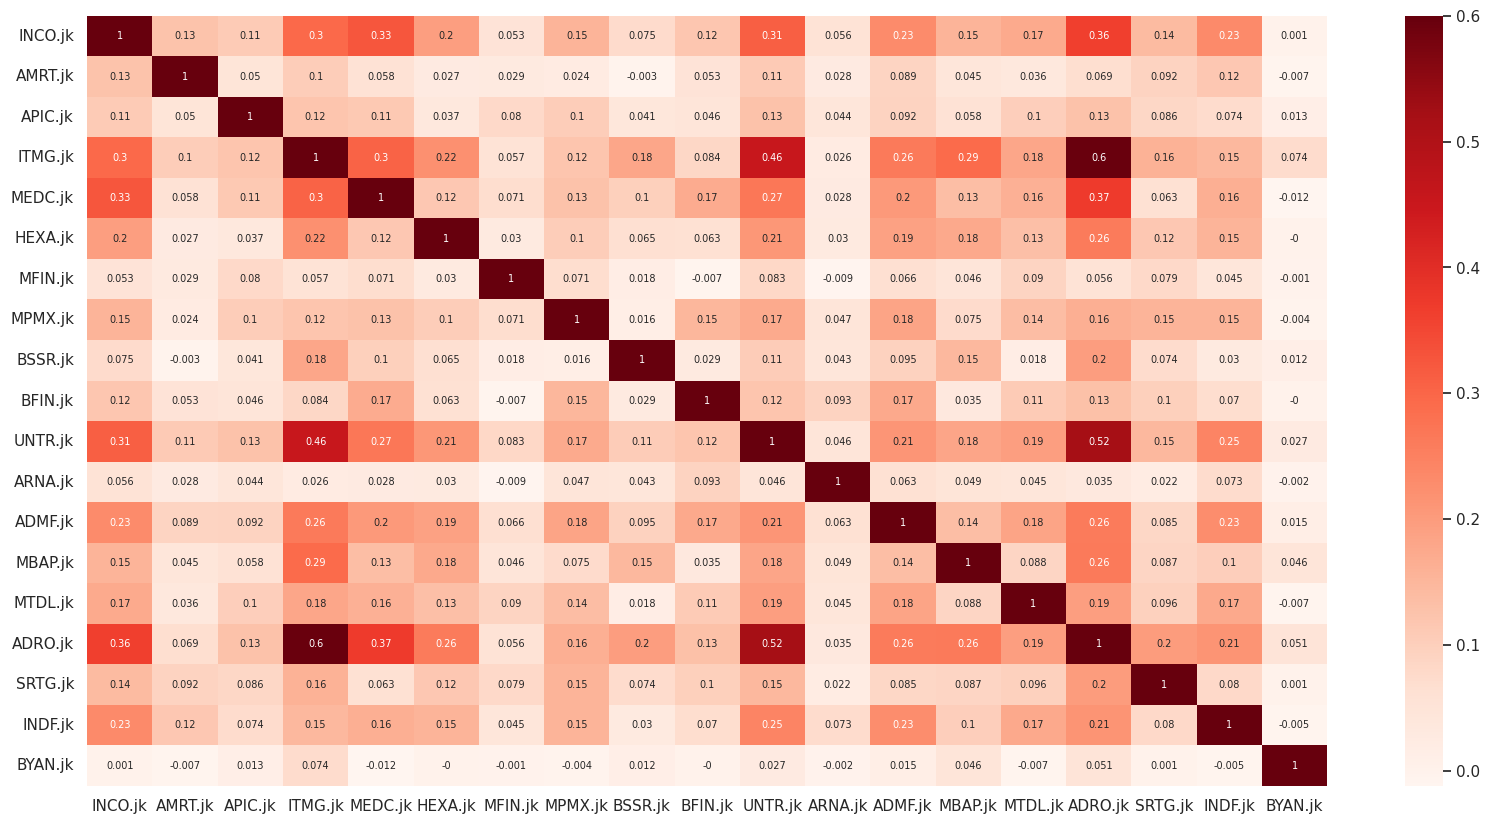

In [9]:
plt.figure(figsize = (20,10))
sns.set(font_scale = 1)
sns.heatmap(round(daily_return.corr(),3), cmap = 'Reds', annot = True, vmax = 0.6, annot_kws = {'size' : 7})
plt.show()